<a href="https://colab.research.google.com/github/Joon-hub/MLZoomcamp/blob/main/MLzoomcamp_Week4_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

## 3.1 Import the churn dataset

In [3]:
!curl -O https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  954k  100  954k    0     0  1610k      0 --:--:-- --:--:-- --:--:-- 1609k


In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.drop(['customerID'], axis =1 , inplace =True)

In [7]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 3.2 Prepare the dataset

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.dtypes

,0
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object
onlinebackup,object


In [10]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.seniorcitizen = df.seniorcitizen.astype('str')
df.dtypes

,0
gender,object
seniorcitizen,object
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object
onlinebackup,object


In [11]:
df.isna().sum()

,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0


In [12]:
df.totalcharges = df.totalcharges.fillna(0)
df.isna().sum()

,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0


In [13]:
categorical = (df.dtypes == 'object')
numerical = (df.dtypes != 'object')
print('categorical_columns', df.columns[categorical],'\n')
print('numerical_columns', df.columns[numerical])

categorical_columns Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object') 

numerical_columns Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')


In [14]:
for col in df.columns[categorical]:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    print(df[col].unique())

['female' 'male']
['0' '1']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no_phone_service' 'no' 'yes']
['dsl' 'fiber_optic' 'no']
['no' 'yes' 'no_internet_service']
['yes' 'no' 'no_internet_service']
['no' 'yes' 'no_internet_service']
['no' 'yes' 'no_internet_service']
['no' 'yes' 'no_internet_service']
['no' 'yes' 'no_internet_service']
['month-to-month' 'one_year' 'two_year']
['yes' 'no']
['electronic_check' 'mailed_check' 'bank_transfer_(automatic)'
 'credit_card_(automatic)']
['no' 'yes']


In [15]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [16]:
df.churn.value_counts(normalize = True).reset_index()

,churn,proportion
0,no,0.73463
1,yes,0.26537


In [17]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [18]:
df.churn = df.churn.map({'yes':1, 'no':0}).astype('int')
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


## 3.3 Setting up validation framework

In [19]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [20]:
df_full_train,df_test = train_test_split(df, test_size=0.20, random_state=1)
df_train,df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
print(len(df_train), len(df_val), len(df_test))

4225 1409 1409


In [21]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

## 3.4 EDA

In [22]:
df.columns[categorical]

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')

In [23]:
list(df.columns[categorical])

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [24]:
categorical = df.columns[categorical].drop('churn').tolist()
numerical = df.columns[numerical].tolist()

In [25]:
df_full_train[categorical].nunique()

,0
gender,2
seniorcitizen,2
partner,2
dependents,2
phoneservice,2
multiplelines,3
internetservice,3
onlinesecurity,3
onlinebackup,3
deviceprotection,3


## 3.5 Feature importance: churn rate and risk ratio

In [26]:
df.churn.value_counts(normalize = True).reset_index()

,churn,proportion
0,0,0.73463
1,1,0.26537


In [27]:
global_churn_rate = df.churn.value_counts(normalize = True).reset_index().iloc[1,1].round(2)
global_churn_rate

0.27

In [28]:
df_full_train[df_full_train.gender == 'female'].churn.mean()

0.27682403433476394

In [29]:
df_full_train.groupby('gender').churn.agg(['mean', 'count']).reset_index()

,gender,mean,count
0,female,0.276824,2796
1,male,0.263214,2838


In [30]:
for col in df_full_train[categorical]:
  df_group = df_full_train.groupby(col).churn.agg(['mean'])
  df_group['diff'] = df_group['mean'] - global_churn_rate
  df_group['risk'] = df_group['mean'] / global_churn_rate
  display(df_group)


,mean,diff,risk
gender,,,
female,0.276824,0.006824,1.025274
male,0.263214,-0.006786,0.974865


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027730,0.897297
1,0.413377,0.143377,1.531027


,mean,diff,risk
partner,,,
no,0.329809,0.059809,1.221515
yes,0.205033,-0.064967,0.759383


,mean,diff,risk
dependents,,,
no,0.313760,0.043760,1.162074
yes,0.165666,-0.104334,0.613579


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028684,0.893764
yes,0.273049,0.003049,1.011292


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012593,0.953361
no_phone_service,0.241316,-0.028684,0.893764
yes,0.290742,0.020742,1.076820


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077653,0.712398
fiber_optic,0.425171,0.155171,1.574709
no,0.077805,-0.192195,0.288167


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150921,1.558967
no_internet_service,0.077805,-0.192195,0.288167
yes,0.153226,-0.116774,0.567503


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134323,1.497494
no_internet_service,0.077805,-0.192195,0.288167
yes,0.217232,-0.052768,0.804564


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125875,1.466205
no_internet_service,0.077805,-0.192195,0.288167
yes,0.230412,-0.039588,0.853379


,mean,diff,risk
techsupport,,,
no,0.418914,0.148914,1.551534
no_internet_service,0.077805,-0.192195,0.288167
yes,0.159926,-0.110074,0.592320


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072832,1.269747
no_internet_service,0.077805,-0.192195,0.288167
yes,0.302723,0.032723,1.121195


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068906,1.255209
no_internet_service,0.077805,-0.192195,0.288167
yes,0.307273,0.037273,1.138047


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161701,1.598893
one_year,0.120573,-0.149427,0.446568
two_year,0.028274,-0.241726,0.104718


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097929,0.637300
yes,0.338151,0.068151,1.252412


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101829,0.622854
credit_card_(automatic),0.164339,-0.105661,0.608661
electronic_check,0.455890,0.185890,1.688482
mailed_check,0.193870,-0.076130,0.718036


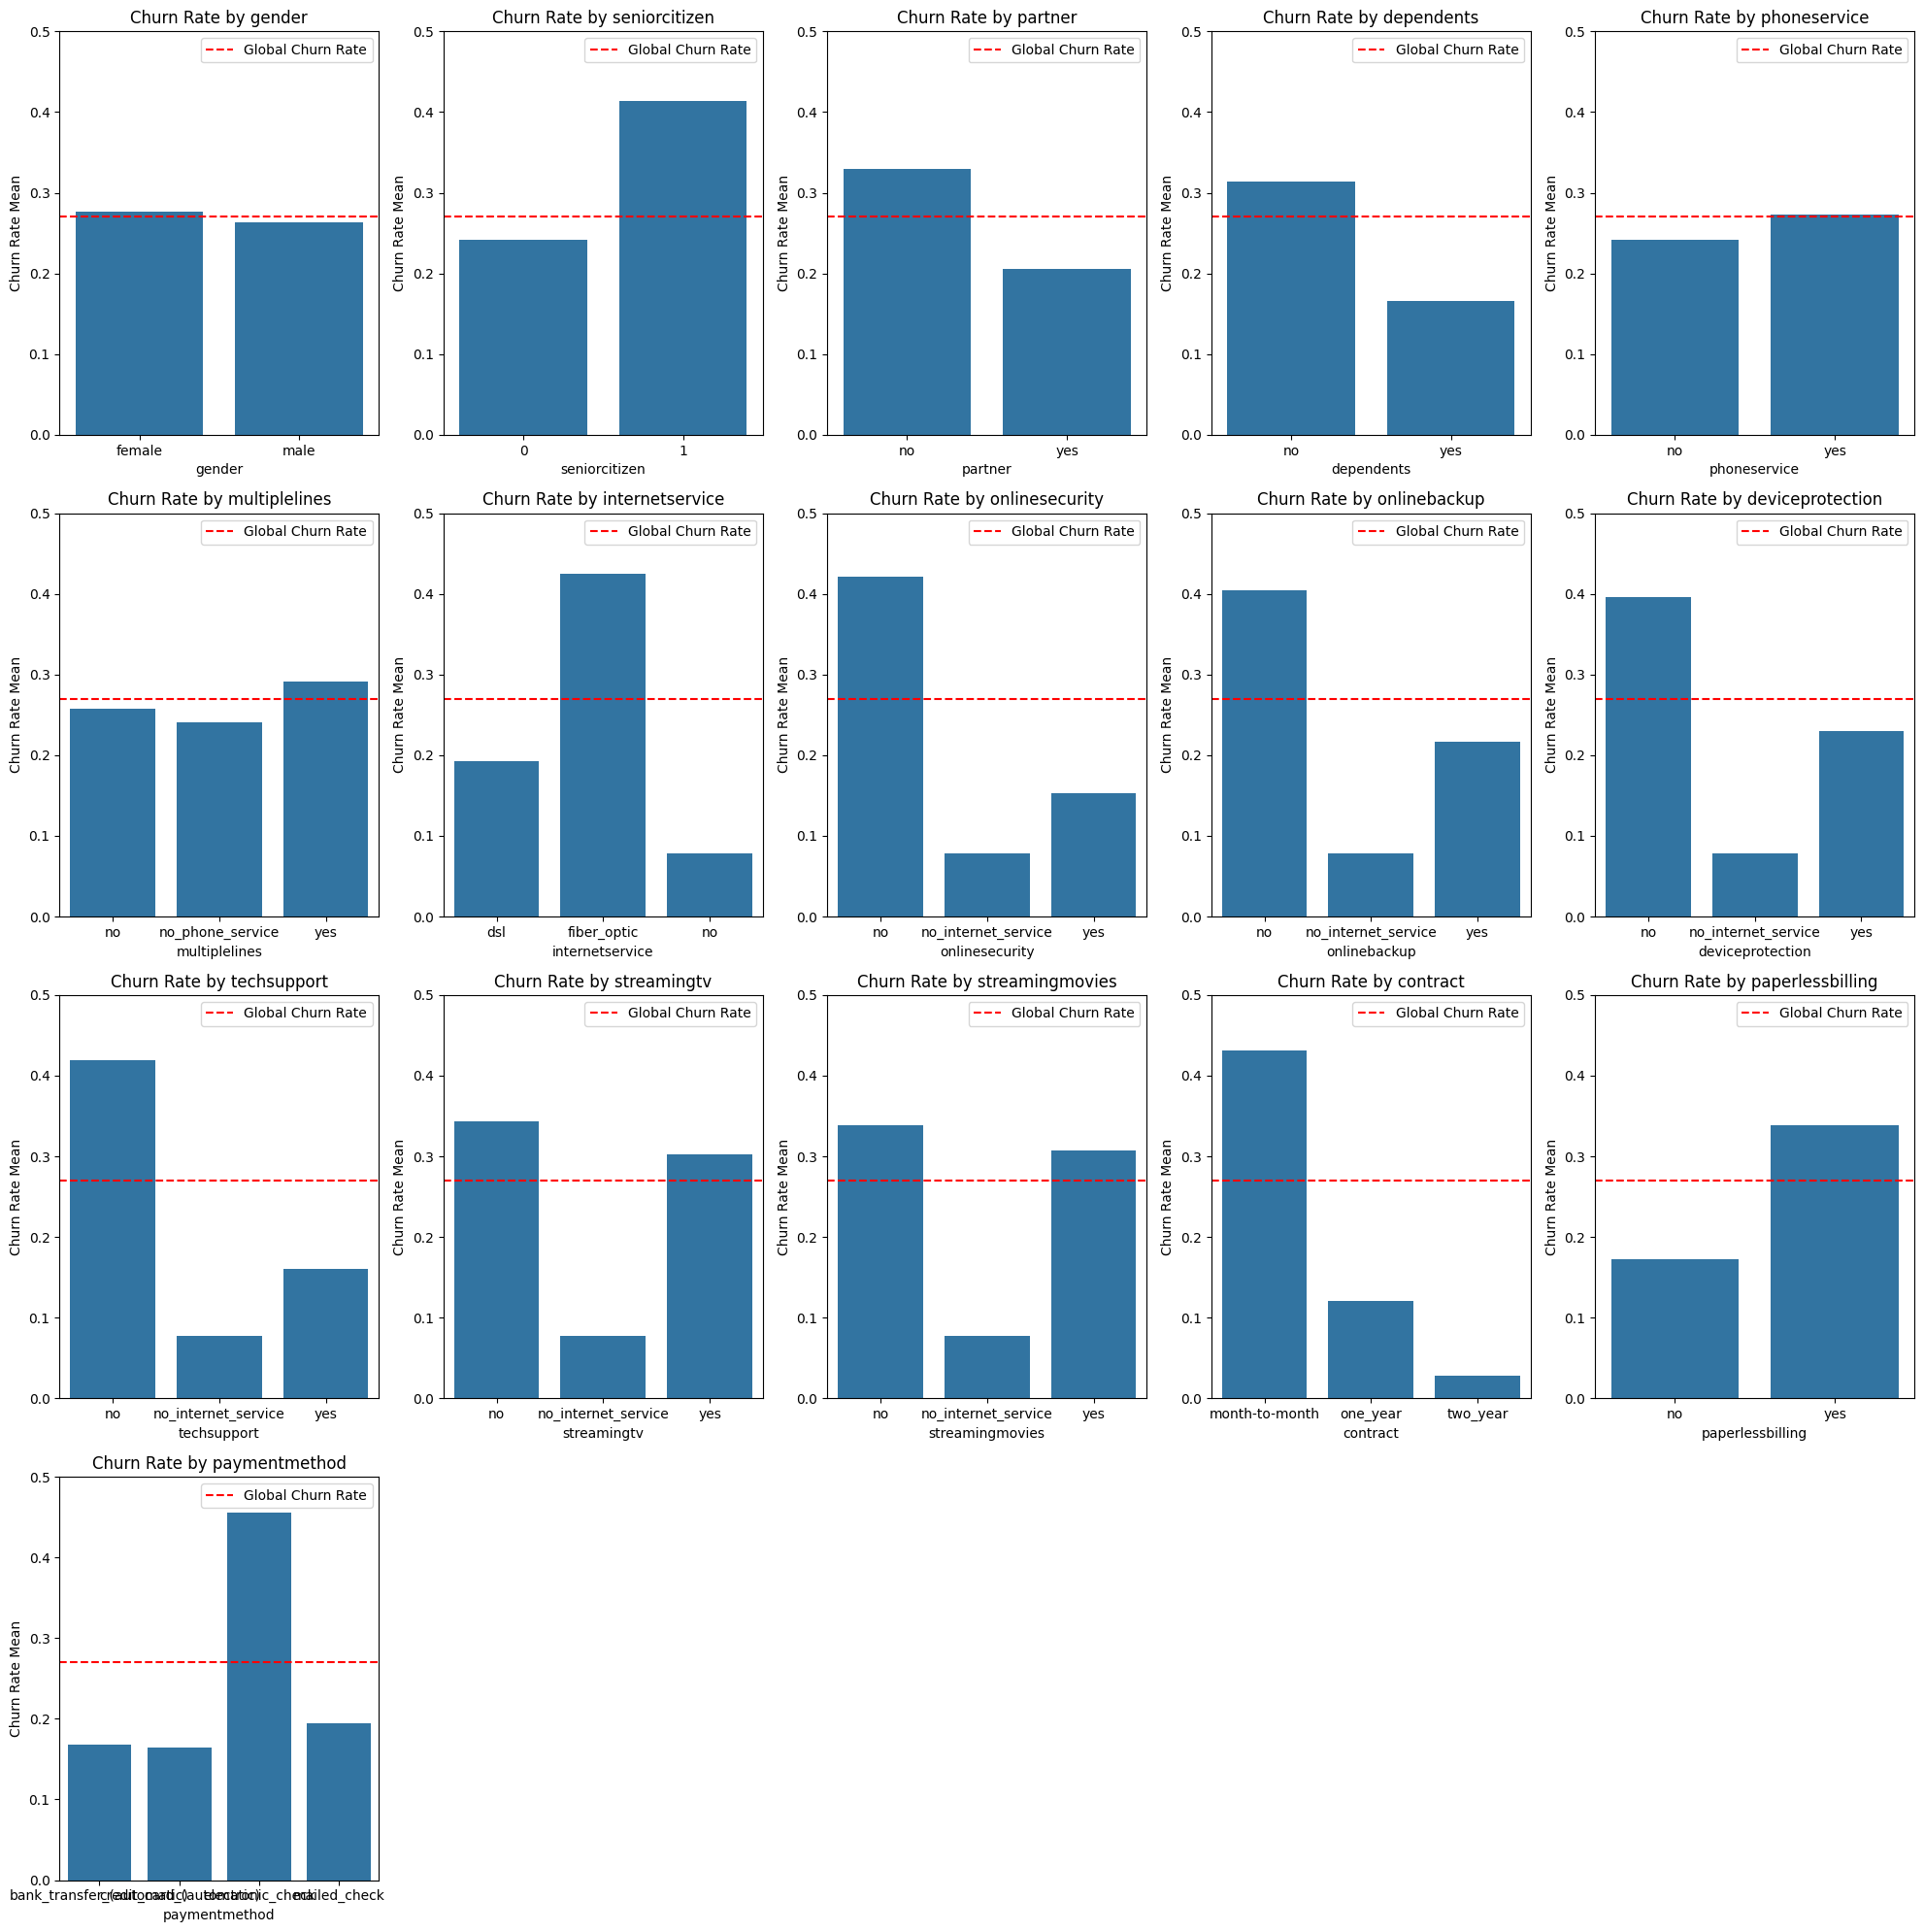

In [31]:
# Define the number of columns for the grid layout
n_cols = 5
n_rows = math.ceil(len(categorical) / n_cols)  # Calculate the required number of rows

# Set the figure size, adjusting for the number of rows and columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes for easy iteration, in case there are more subplots than categorical columns
axes = axes.flatten()

# Loop through the categorical columns and create barplots
for i, col in enumerate(df_full_train[categorical]):
    # Group by the categorical column and calculate churn statistics
    df_group = df_full_train.groupby(col).churn.agg(['mean'])

    # Calculate the difference and risk metrics
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate

    # Create a barplot for each categorical column in the corresponding subplot
    sns.barplot(ax=axes[i], data=df_group.reset_index(), x=col, y='mean')

    # Add a horizontal line for the global churn rate
    axes[i].axhline(global_churn_rate, color='red', linestyle='--', label='Global Churn Rate')

    # Set title and labels for clarity
    axes[i].set_title(f'Churn Rate by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Churn Rate Mean')

    # Set y-axis limits
    axes[i].set_ylim(0.0, 0.5)

    # Add legend to indicate the global churn rate line
    axes[i].legend()

# Remove any unused subplots if there are more subplots than categorical columns
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout so plots don't overlap
plt.tight_layout()
plt.show()


## 3.6 Mutual information score

In [32]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(series):
  return mutual_info_score(series, df_full_train.churn)

for col in df.columns:
  ix = mutual_info_churn_score(df_full_train[col])
  print(col, ix.round(3))

gender 0.0
seniorcitizen 0.009
partner 0.01
dependents 0.012
tenure 0.082
phoneservice 0.0
multiplelines 0.001
internetservice 0.056
onlinesecurity 0.063
onlinebackup 0.047
deviceprotection 0.043
techsupport 0.061
streamingtv 0.032
streamingmovies 0.032
contract 0.098
paperlessbilling 0.018
paymentmethod 0.043
monthlycharges 0.197
totalcharges 0.548
churn 0.583


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


## 3.7 Feature importance of numerical variables

In [33]:
df_full_train[numerical].corrwith(df.churn).abs().sort_values(ascending = False)


,0
tenure,0.351885
monthlycharges,0.196805
totalcharges,0.196353


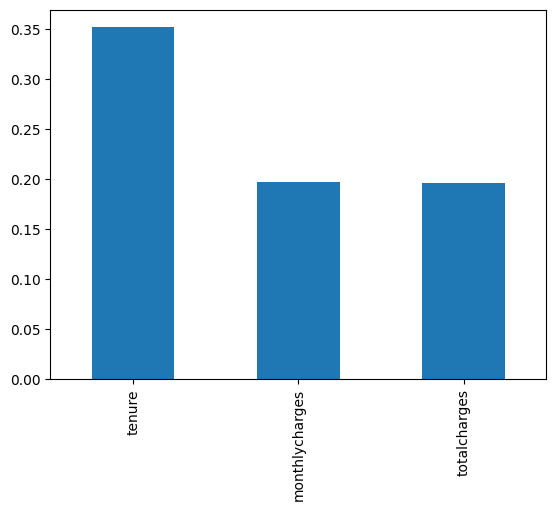

In [34]:
df_full_train[numerical].corrwith(df.churn).abs().sort_values(ascending = False).plot(kind = 'bar');

In [35]:
df_full_train.tenure.describe().T

,tenure
count,5634.000000
mean,32.277955
std,24.555211
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [36]:
df_full_train[df_full_train.tenure <= 12].churn.mean().round(3)

0.476

In [37]:
df_full_train[(df_full_train.tenure >= 12) & (df_full_train.tenure <= 24)].churn.mean().round(3)

0.305

In [38]:
df_full_train[df_full_train.tenure >= 24].churn.mean().round(3)

0.146

## 3.8 OneHotEncoding

In [39]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
ohe = OneHotEncoder(sparse_output=False)
X_train_cat = ohe.fit_transform(df_train[categorical])
X_val_cat = ohe.fit_transform(df_val[categorical])
X_test_cat = ohe.fit_transform(df_test[categorical])

# Concatenate encoded categorical columns with numerical columns
X_train = np.hstack([X_train_cat, df_train[numerical].values])
X_val = np.hstack([X_val_cat, df_val[numerical].values])
X_test = np.hstack([X_test_cat, df_test[numerical].values])

ohe.get_feature_names_out()

array(['gender_female', 'gender_male', 'seniorcitizen_0',
       'seniorcitizen_1', 'partner_no', 'partner_yes', 'dependents_no',
       'dependents_yes', 'phoneservice_no', 'phoneservice_yes',
       'multiplelines_no', 'multiplelines_no_phone_service',
       'multiplelines_yes', 'internetservice_dsl',
       'internetservice_fiber_optic', 'internetservice_no',
       'onlinesecurity_no', 'onlinesecurity_no_internet_service',
       'onlinesecurity_yes', 'onlinebackup_no',
       'onlinebackup_no_internet_service', 'onlinebackup_yes',
       'deviceprotection_no', 'deviceprotection_no_internet_service',
       'deviceprotection_yes', 'techsupport_no',
       'techsupport_no_internet_service', 'techsupport_yes',
       'streamingtv_no', 'streamingtv_no_internet_service',
       'streamingtv_yes', 'streamingmovies_no',
       'streamingmovies_no_internet_service', 'streamingmovies_yes',
       'contract_month-to-month', 'contract_one_year',
       'contract_two_year', 'paperlessbilling

In [40]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4225, 46)
(1409, 46)
(1409, 46)


## 3.9 Logistic regression

## 3.10 Training logistic regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [42]:
y_pred_val = model.predict(X_val)
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

# validation accuracy
print(f'validation accuracy: {round(accuracy_score(y_val, y_pred_val),3)}')
print(f'test accuracy: {round(accuracy_score(y_test, y_pred),3)}')

validation accuracy: 0.804
test accuracy: 0.81


In [44]:
X_test[0]

array([1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 4.10000e+01, 7.98500e+01,
       3.32075e+03])

## 3.11 Model interpretation

- Look at the cofficients
- Train a smaller model with fewer features

In [45]:
model.n_features_in_

46

In [46]:
model.intercept_.round(3)

array([-0.086])

In [47]:
model.coef_.round(3)

array([[-0.025, -0.061, -0.16 ,  0.075, -0.115,  0.03 , -0.001, -0.085,
         0.131, -0.217, -0.252,  0.131,  0.034, -0.309,  0.295, -0.072,
         0.271, -0.072, -0.285,  0.072, -0.072, -0.085,  0.075, -0.072,
        -0.089,  0.229, -0.072, -0.243, -0.055, -0.072,  0.041, -0.098,
        -0.072,  0.084,  0.439, -0.161, -0.364, -0.244,  0.158, -0.085,
        -0.035,  0.106, -0.071, -0.071,  0.004,  0.   ]])

In [48]:
model.predict_proba(X_test)[0][1]

0.04831839286159088

In [49]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [50]:
model.predict_proba(X_test)[-1][1]

0.5967861837312116

In [51]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

## 3.12 Regularized logistic regression

In [52]:
# L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

# L2 regularization
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=1.5)

# Fit the models
model_l1.fit(X_train, y_train)
model_l2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.5)

In [53]:
y_pred_val_l1 = model_l1.predict(X_val)
y_pred_l1 = model_l1.predict(X_test)

print(f'validation accuracy model: {round(accuracy_score(y_pred_val_l1, y_val),3)}')
print(f'test accuracy modek: {round(accuracy_score(y_test, y_pred_l1),3)}')

validation accuracy model: 0.806
test accuracy modek: 0.807


In [54]:
y_pred_val_l2 = model_l1.predict(X_val)
y_pred_l2 = model_l1.predict(X_test)

print(f'validation accuracy model_l1: {round(accuracy_score(y_val, y_pred_val_l2),3)}')
print(f'test accuracy modek_l1: {round(accuracy_score(y_test, y_pred_l2),3)}')

validation accuracy model_l1: 0.806
test accuracy modek_l1: 0.807


In [55]:
y_pred_val = model_l2.predict(X_val)
y_pred = model_l2.predict(X_test)

print(f'validation accuracy model_l2: {round(accuracy_score(y_val, y_pred_val),3)}')
print(f'test accuracy model_l2: {round(accuracy_score(y_test, y_pred),3)}')

validation accuracy model_l2: 0.803
test accuracy model_l2: 0.808


# Week 4

## 4.2 Accuracy and dummy model

- calculate accuracy manually on validation set
- calculate accuracy for different threshold values
- plot the accuracy values for different threshold values

In [56]:
# calculate accuracr on validation set
len(y_val)

1409

In [57]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [58]:
y_val_pred = model_l2.predict(X_val)
y_val_pred

array([0, 0, 0, ..., 0, 1, 1])

In [59]:
y_val_pred.sum()/y_val.sum()

0.8082901554404145

In [60]:
y_val_pred_proba = model_l2.predict_proba(X_val)
y_val_pred_proba[:,0]

array([0.99079458, 0.79209473, 0.78758007, ..., 0.86834958, 0.19101275,
       0.15952388])

In [61]:
thresholds = np.linspace(0,1,21,)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [62]:
val_accuracy = []
for t in thresholds:
  y_pred_val = np.where(y_val_pred_proba[:,1] >=t, 1, 0)
  print('y_pred_val:', y_pred_val.sum())
  accu = (y_pred_val == y_val).mean()
  val_accuracy.append(accu)
  print("%.2f, %.3f" %(t, accu))


y_pred_val: 1409
0.00, 0.274
y_pred_val: 1065
0.05, 0.508
y_pred_val: 918
0.10, 0.594
y_pred_val: 786
0.15, 0.666
y_pred_val: 688
0.20, 0.709
y_pred_val: 593
0.25, 0.738
y_pred_val: 518
0.30, 0.763
y_pred_val: 476
0.35, 0.771
y_pred_val: 417
0.40, 0.784
y_pred_val: 359
0.45, 0.792
y_pred_val: 312
0.50, 0.803
y_pred_val: 265
0.55, 0.803
y_pred_val: 200
0.60, 0.796
y_pred_val: 149
0.65, 0.784
y_pred_val: 96
0.70, 0.766
y_pred_val: 42
0.75, 0.744
y_pred_val: 16
0.80, 0.735
y_pred_val: 0
0.85, 0.726
y_pred_val: 0
0.90, 0.726
y_pred_val: 0
0.95, 0.726
y_pred_val: 0
1.00, 0.726


Text(0, 0.5, 'val_accuracy')

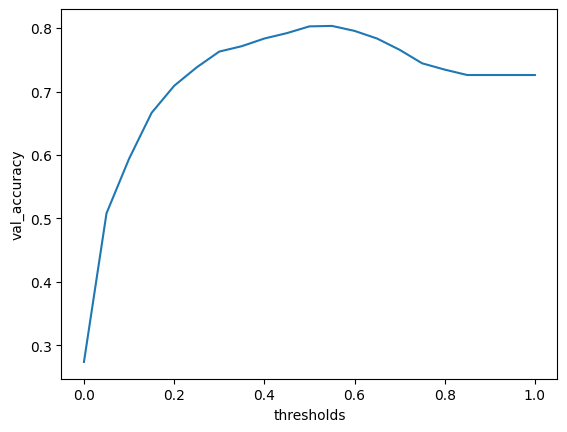

In [63]:
plt.plot(thresholds,val_accuracy)
plt.xlabel('thresholds')
plt.ylabel('val_accuracy')

- At a threshold of 0, the validation accuracy is 27.4%, and the model predicts that every employee will churn.

- At a threshold of 1, the validation accuracy increases to 72.6%, and the model predicts that no one will churn (this reflects the accuracy of a dummy model with 72.6%).

- Using a logistic regression model, we've improved the accuracy by approximately 8%, highlighting that accuracy is not the best metric in this case due to class imbalance.

## 4.3 Confusion Table
- calculate all the values
  - True positive
  - True Negative
  - False positive
  - False Negative
- Make the confusion matrix with absolute values
- Confusion matrix with percentages

In [64]:
True_positive = np.where(y_val_pred_proba[:,1] >= 0.5,1,0) & (y_val == 1)
False_positive = np.where(y_val_pred_proba[:,1] >= 0.5,1,0) & (y_val == 0)

True_negative = np.where(y_val_pred_proba[:,1] <= 0.5,1,0) & (y_val == 0)
False_negative = np.where(y_val_pred_proba[:,1] <= 0.5,1,0) & (y_val == 1)

TP = True_positive.sum()
FP = False_positive.sum()
TN = True_negative.sum()
FN = False_negative.sum()

conf_matrix = np.array([[TP,FN],
                        [FP,TN]])

print(conf_matrix)

[[210 176]
 [102 921]]


In [65]:
total = conf_matrix.sum()
total

1409

In [66]:
percentage_matrix = (conf_matrix / total) * 100
np.round(percentage_matrix,1)

array([[14.9, 12.5],
       [ 7.2, 65.4]])

- **False Positives**: There are 102 customers who won’t receive promotion emails, allowing us to save money.

- **True Positives**: 210 customers will receive the promotion email, while **False Negatives**: 176 customers will also receive the promotion email.

## 4.4 Precision and Recall

In [67]:
predicted_positive = np.where(y_val_pred_proba[:,1] >= 0.5,1,0).sum()
predicted_positive

312

In [68]:
actual_positive = y_val.sum()
actual_positive

386

In [69]:
actual_negative = np.sum(y_val == 0)
actual_negative

1023

In [70]:
precision = TP/predicted_positive
precision.round(4)

0.6731

- precison tells us that we are sending 33% wrong emails to the customers that are not going to churn. wasting of money

- Predictive_positive = TP + FP
- Precision =. TP / TP + FP

In [71]:
Recall = TP/actual_positive
Recall.round(2)

0.54

- recall tells us that we are missing 46% of customers who are going to churn and we are not sendig the promotion emails

- actual_positive = TP + FN
- Recall =. TP/TP+FN

ideal scenario will we will increase True positive

## 4.5 ROC Curves

In [72]:
# TPR is also called recall = TP/TP+FN
True_positive = (np.where(y_val_pred_proba[:,1] >= 0.5,1,0) & (y_val == 1)).sum()
False_negative = (np.where(y_val_pred_proba[:,1]>=0.5,1,0) & (y_val == 0)).sum()

actual_positive = np.where(y_val == 1,1,0).sum()
actual_negative = np.where(y_val == 0,1,0).sum()

In [73]:
TPR = TP/ actual_positive
TPR.round(3)

0.544

- TPR is also called recall = TP/TP+FN
- TPR tells us that how many positives (y=1) we have correctly identified

In [74]:
FPR = FP / actual_negative
FPR.round(4)

0.0997

- FPR  = FP/ TN+FP

- FPR tells us that how many negatives (y=0) we have correctly identified

In [75]:
thresholds = np.linspace(0,1,21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [76]:
tpr = []
fpr = []
tp = []
fp = []
act_pos = []
act_neg = []


for t in thresholds:
  True_positive = np.where(y_val_pred_proba[:,1] >= t,1,0) & (y_val==1)
  False_positive = np.where(y_val_pred_proba[:,1] >= t,1,0)& (y_val==0)

  tp.append(True_positive.sum())
  fp.append(False_positive.sum())

  actual_positive = np.where(y_val == 1,1,0).sum()
  actual_negative = np.where(y_val == 0,1,0).sum()

  TPR = True_positive.sum()/ actual_positive
  FPR = False_positive.sum() / actual_negative

  tpr.append(TPR)
  fpr.append(FPR)

  act_neg.append(actual_negative)
  act_pos.append(actual_positive)

data = [thresholds,tp,fp,act_pos,act_neg,tpr,fpr]

df_aoc = pd.DataFrame(data, index = ['threshold','tp','fp','act_pos','act_neg','tpr','fpr']).T
df_aoc.head(20)


,threshold,tp,fp,act_pos,act_neg,tpr,fpr
0,0.00,386.0,1023.0,386.0,1023.0,1.000000,1.000000
1,0.05,379.0,686.0,386.0,1023.0,0.981865,0.670577
2,0.10,366.0,552.0,386.0,1023.0,0.948187,0.539589
3,0.15,351.0,435.0,386.0,1023.0,0.909326,0.425220
4,0.20,332.0,356.0,386.0,1023.0,0.860104,0.347996
5,0.25,305.0,288.0,386.0,1023.0,0.790155,0.281525
6,0.30,285.0,233.0,386.0,1023.0,0.738342,0.227761
7,0.35,270.0,206.0,386.0,1023.0,0.699482,0.201369
8,0.40,249.0,168.0,386.0,1023.0,0.645078,0.164223
9,0.45,226.0,133.0,386.0,1023.0,0.585492,0.130010


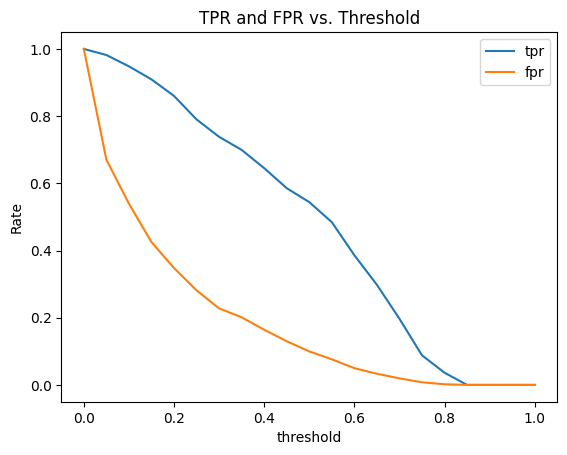

In [77]:
plt.plot(df_aoc.threshold,df_aoc.tpr, label = 'tpr')
plt.plot(df_aoc.threshold,df_aoc.fpr, label = 'fpr')
plt.legend()
plt.xlabel('threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR vs. Threshold')
plt.show()


- when tpr and fpr values are equal to 1 and threshold  =0 means , the model predicts that all instances are positive regardless of the actual label. This is why both TPR and FPR reach their maximum values:

- Precision focuses on the accuracy of positive predictions, while FPR focuses on the accuracy of negative predictions.

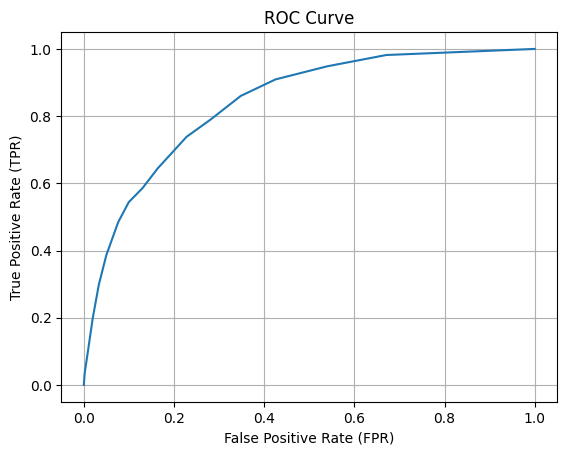

In [78]:
# Plotting the ROC curve
plt.plot(df_aoc.fpr, df_aoc.tpr)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.grid()
plt.show()


#### roc curves for random model

In [79]:
np.random.uniform(0,1,size = len(y_val))

array([0.95506793, 0.36300383, 0.20057595, ..., 0.22063654, 0.06013926,
       0.88153582])

In [80]:
y_rand = np.random.uniform(0,1,size = len(y_val))

In [81]:
# accuracy of model y_rand >0.5 threshold
(np.where(y_rand >= 0.5,1,0)== (y_val)).mean()

0.47267565649396737

50% accuracy of y_rand model

In [82]:
tpr = []
fpr = []
tp = []
fp = []
act_pos = []
act_neg = []


for t in thresholds:
  True_positive = np.where(y_rand >= t,1,0) & (y_val==1)
  False_positive = np.where(y_rand >= t,1,0)& (y_val==0)

  tp.append(True_positive.sum())
  fp.append(False_positive.sum())

  actual_positive = np.where(y_val == 1,1,0).sum()
  actual_negative = np.where(y_val == 0,1,0).sum()

  TPR = True_positive.sum()/ actual_positive
  FPR = False_positive.sum() / actual_negative

  tpr.append(TPR)
  fpr.append(FPR)

  act_neg.append(actual_negative)
  act_pos.append(actual_positive)

data = [thresholds,tp,fp,act_pos,act_neg,tpr,fpr]

df_aoc = pd.DataFrame(data, index = ['threshold','tp','fp','act_pos','act_neg','tpr','fpr']).T
display(df_aoc.head(20))


,threshold,tp,fp,act_pos,act_neg,tpr,fpr
0,0.00,386.0,1023.0,386.0,1023.0,1.000000,1.000000
1,0.05,366.0,968.0,386.0,1023.0,0.948187,0.946237
2,0.10,344.0,915.0,386.0,1023.0,0.891192,0.894428
3,0.15,325.0,862.0,386.0,1023.0,0.841969,0.842620
4,0.20,303.0,809.0,386.0,1023.0,0.784974,0.790811
5,0.25,283.0,764.0,386.0,1023.0,0.733161,0.746823
6,0.30,264.0,723.0,386.0,1023.0,0.683938,0.706745
7,0.35,245.0,686.0,386.0,1023.0,0.634715,0.670577
8,0.40,228.0,623.0,386.0,1023.0,0.590674,0.608993
9,0.45,204.0,570.0,386.0,1023.0,0.528497,0.557185


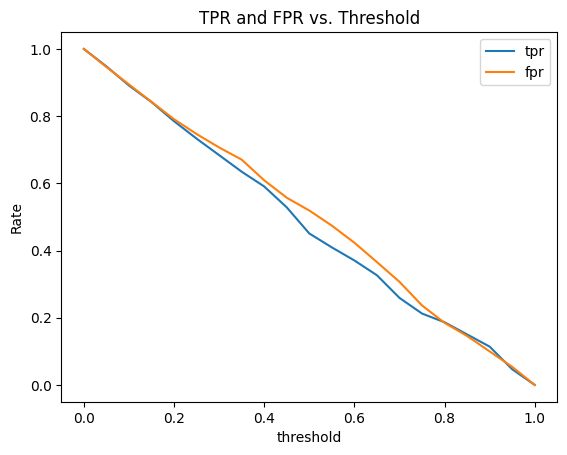

In [83]:
plt.plot(df_aoc.threshold,df_aoc.tpr, label = 'tpr')
plt.plot(df_aoc.threshold,df_aoc.fpr, label = 'fpr')
plt.legend()
plt.xlabel('threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR vs. Threshold')
plt.show()

#### roc curves for ideal model

In [84]:
np.unique(y_val, return_counts = True)

(array([0, 1]), array([1023,  386]))

In [85]:
1023/(1023+386)

0.7260468417317246

- so our model has 1023 value is zero and 386 value as 1
- with threshold value of 0.726 we can have ideal model

In [86]:
y_ideal = np.repeat([0,1],[1023,386])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [87]:
y_ideal_pred = np.linspace(0,1,len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [88]:
# accuracy of ideal model
((y_ideal_pred>= 0.726) == y_ideal).mean()

1.0

In [89]:
tpr = []
fpr = []
tp = []
fp = []
act_pos = []
act_neg = []


for t in thresholds:
  True_positive = np.where(y_ideal_pred >= t,1,0) & (y_ideal==1)
  False_positive = np.where(y_ideal_pred >= t,1,0)& (y_ideal==0)

  tp.append(True_positive.sum())
  fp.append(False_positive.sum())

  actual_positive = np.where(y_val == 1,1,0).sum()
  actual_negative = np.where(y_val == 0,1,0).sum()

  TPR = True_positive.sum()/ actual_positive
  FPR = False_positive.sum() / actual_negative

  tpr.append(TPR)
  fpr.append(FPR)

  act_neg.append(actual_negative)
  act_pos.append(actual_positive)

data = [thresholds,tp,fp,act_pos,act_neg,tpr,fpr]

df_aoc = pd.DataFrame(data, index = ['threshold','tp','fp','act_pos','act_neg','tpr','fpr']).T
display(df_aoc.head(20))

,threshold,tp,fp,act_pos,act_neg,tpr,fpr
0,0.00,386.0,1023.0,386.0,1023.0,1.000000,1.000000
1,0.05,386.0,952.0,386.0,1023.0,1.000000,0.930596
2,0.10,386.0,882.0,386.0,1023.0,1.000000,0.862170
3,0.15,386.0,811.0,386.0,1023.0,1.000000,0.792766
4,0.20,386.0,741.0,386.0,1023.0,1.000000,0.724340
5,0.25,386.0,671.0,386.0,1023.0,1.000000,0.655914
6,0.30,386.0,600.0,386.0,1023.0,1.000000,0.586510
7,0.35,386.0,530.0,386.0,1023.0,1.000000,0.518084
8,0.40,386.0,459.0,386.0,1023.0,1.000000,0.448680
9,0.45,386.0,389.0,386.0,1023.0,1.000000,0.380254


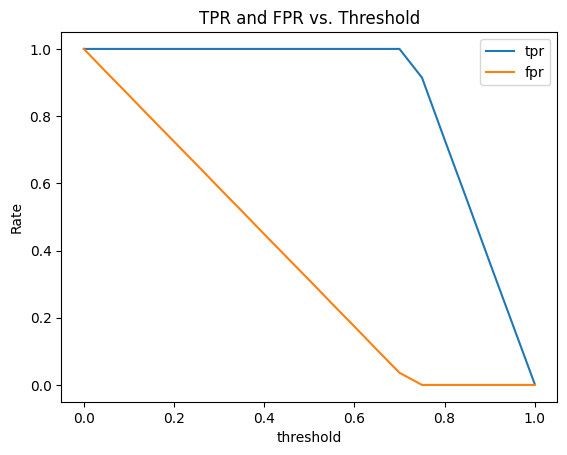

In [90]:
plt.plot(df_aoc.threshold,df_aoc.tpr, label = 'tpr')
plt.plot(df_aoc.threshold,df_aoc.fpr, label = 'fpr')
plt.legend()
plt.xlabel('threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR vs. Threshold')
plt.show()

## 4.5 Roc Curve continued using sklearn

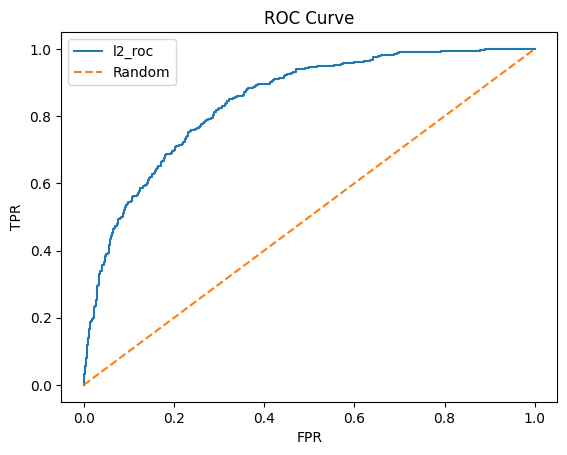

In [91]:
from sklearn.metrics import roc_curve

y_pred_val_l2_proba = model_l2.predict_proba(X_val)[:,1]

fpr, tpr, thresholds = roc_curve(y_val, y_pred_val_l2_proba)

plt.plot(fpr, tpr, label='l2_roc')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [92]:
len(y_pred_val_l2)

1409

In [93]:
len(y_val)

1409

In [94]:
len(thresholds)

387

## 4.6 ROC AUC
- Area under ROC curve
- Interpretation of AUC

In [98]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8439290109856716

In [100]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_val_l2_proba)

0.8439290109856716

In [133]:
import numpy as np

# Step 1: Define the number of samples to draw
n = 50000  # We are going to sample 50,000 positive and negative pairs

# Step 2: Separate predictions based on true labels
# `y_val == 0` are the negative class indices
# `y_val == 1` are the positive class indices
neg = y_pred_val_l2_proba[y_val == 0]  # Predictions for the negative class
pos = y_pred_val_l2_proba[y_val == 1]  # Predictions for the positive class

# Step 3: Check the number of positive and negative samples and total labels
# This print statement helps to ensure that the lengths of pos, neg, and y_val are as expected.
print(len(pos), len(neg), len(y_val))

# Step 4: Set the seed for reproducibility
# Setting a seed ensures that we get the same random samples every time we run the code.
np.random.seed(1)

# Step 5: Generate random indices for sampling
# `np.random.randint(0, len(pos), size=n)` generates 'n' random indices from the positive class
# Similarly, we generate 'n' random indices for the negative class
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

# Step 6: Compare sampled positive and negative probabilities
# This compares if positive samples are greater than the negative ones element-wise
# `mean()` is used to calculate the percentage of times the positive samples were greater than the negative ones.
result = (pos[pos_ind] > neg[neg_ind]).mean()

# Step 7: Output the result
print(result)


386 1023 1409
0.84704


## 4.7 Cross Validation

- evaluatuing the model on different subset of the data
- Getting the average prediction and the spread within predictions

In [136]:
from sklearn.feature_extraction import DictVectorizer

def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [137]:
dv, model = train(df_train, y_train, C=0.001)

In [138]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [139]:
y_pred = predict(df_val, dv, model)

In [142]:
!pip install tqdm

In [149]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings("ignore")


n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.008
C=0.1 0.842 +- 0.007
C=0.5 0.842 +- 0.007
C=1 0.842 +- 0.007
C=5 0.842 +- 0.007
C=10 0.842 +- 0.007


In [145]:
scores

[0.8446711306136226,
 0.8452212455303934,
 0.8333132651013445,
 0.8348048698599476,
 0.8517970882620564]

In [146]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8584438341620895

## 4.8 Summary
Metric - a single number that describes the performance of a model

- Accuracy - fraction of correct answers; sometimes misleading
- Precision and recall are less misleading when we have class inbalance
- ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance
- K-Fold CV - more reliable estimate for performance (mean + std)

## 4.9 Explore more
- Check the precision and recall of the dummy classifier that always predict "FALSE"
- F1 score = 2 * P * R / (P + R)
- Evaluate precision and recall at different thresholds, plot P vs R - this way you'll get the precision/recall curve (similar to ROC curve)
- Area under the PR curve is also a useful metric

**Other projects:**

- Calculate the metrics for datasets from the previous week